# Deep Learning: Assignment 5

<ol>
<li>Understand and implement the different initialization methods:<br> Zeros, random, Xavier, He
<li>Understand and implement the different activation functions:<br> sigmoid, tanh, relu, leaky-relu
<li>Perform experiments using varaious combinations of initialization methods and activation functions<br> and analyze the error rate, accuracy and convergence time
</ol>

### Import necessary libraries

In [1]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from sklearn.metrics import accuracy_score, mean_squared_error

In [2]:
sns.set()

### Activation Function

**Sigmoid Function**

In [3]:
#function for sigmoid neuron
def sigmoid(x, w, b):
    return 1/(1 + np.exp(-(w*x + b)))

#input data
values = np.arange(-10, 10, 0.1)
w = 1.0
b = 1.0

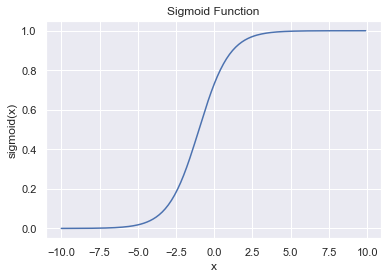

In [4]:
#plot for 1-D sigmoid neuron
plt.plot(values, sigmoid(values,w,b))
plt.xlabel('x')
plt.ylabel('sigmoid(x)')
plt.title('Sigmoid Function')
plt.show()

**Tanh Function**

In [5]:
#function for tanh neuron
def tanh(x, w, b):
    return (2.0/(1.0 + np.exp(-2*x))) - 1

#input data
values = np.arange(-10, 10, 0.1)
w = 1.0
b = 1.0

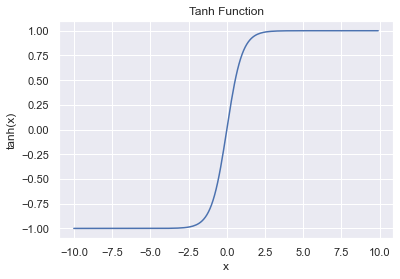

In [6]:
#plot for 1-D tanh neuron
plt.plot(values, tanh(values,w,b))
plt.xlabel('x')
plt.ylabel('tanh(x)')
plt.title('Tanh Function')
plt.show()

**Relu Function**

In [7]:
#function for relu neuron
def relu(x, w, b):
    result=[]
    for item in x:
        result.append(max(0.0, item))
    return result

#input data
values = np.arange(-10, 10, 0.1)
w = 1.0
b = 1.0

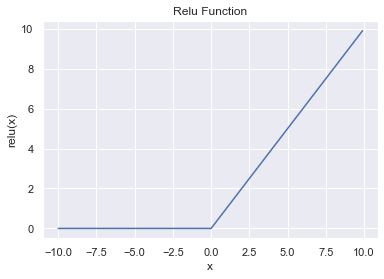

In [8]:
#plot for 1-D relu neuron
plt.plot(values, relu(values,w,b))
plt.xlabel('x')
plt.ylabel('relu(x)')
plt.title('Relu Function')
plt.show()

**Generate Data**

In [9]:
data, labels = make_blobs(n_samples=500, centers=2, n_features=2, random_state=12)
print(data.shape, labels.shape)

(500, 2) (500,)


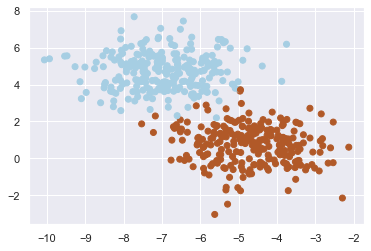

In [10]:
plt.scatter(data[:,0], data[:,1], c=labels, cmap='Paired')

**Split Dataset**

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(data, labels, stratify=labels, random_state=100)

**Neural Network Class**

In [12]:
class neuralNetwork:
    def __init__(self):
        #initialize weight to random values and bias to zero
        self.w1 = np.random.randn()
        self.w2 = np.random.randn()
        self.w3 = np.random.randn()
        self.w4 = np.random.randn()
        self.w5 = np.random.randn()
        self.w6 = np.random.randn()
        self.b1 = 0
        self.b2 = 0
        self.b3 = 0
        
    def sigmoid(self, x):
        return 1.0/(1.0 + np.exp(-x))
    
    def tanh(self, x):
        return (2.0/(1.0 + np.exp(-2*x))) - 1
    
    def relu(self, x):
        return max(0.0, x)
    
    def forward_pass_sigmoid(self, x):
        self.x1, self.x2 = x
        self.a1 = self.w1*self.x1 + self.w2*self.x2 + self.b1
        self.h1 = self.sigmoid(self.a1)
        self.a2 = self.w3*self.x1 + self.w4*self.x2 + self.b2
        self.h2 = self.sigmoid(self.a2)
        self.a3 = self.w5*self.h1 + self.w6*self.h2 + self.b3
        self.h3 = self.sigmoid(self.a3)
        return self.h3
    
    def forward_pass_tanh(self, x):
        self.x1, self.x2 = x
        self.a1 = self.w1*self.x1 + self.w2*self.x2 + self.b1
        self.h1 = self.tanh(self.a1)
        self.a2 = self.w3*self.x1 + self.w4*self.x2 + self.b2
        self.h2 = self.tanh(self.a2)
        self.a3 = self.w5*self.h1 + self.w6*self.h2 + self.b3
        self.h3 = self.tanh(self.a3)
        return self.h3
    
    def forward_pass_relu(self, x):
        self.x1, self.x2 = x
        self.a1 = self.w1*self.x1 + self.w2*self.x2 + self.b1
        self.h1 = self.relu(self.a1)
        self.a2 = self.w3*self.x1 + self.w4*self.x2 + self.b2
        self.h2 = self.relu(self.a2)
        self.a3 = self.w5*self.h1 + self.w6*self.h2 + self.b3
        self.h3 = self.relu(self.a3)
        #print(self.h1, self.w1, self.a1)
        #print(self.h2, self.w2, self.a2)
        #print(self.h3, self.w3, self.a3)
        #print('-----')
        return self.h3
    
    def grad(self, x, y, af='sigmoid'):
        if af=='sigmoid':
            self.forward_pass_sigmoid(x)
        if af=='tanh':
            self.forward_pass_tanh(x)
        if af=='relu':
            self.forward_pass_relu(x)
        self.dw5 = (self.h3-y) * self.h3*(1-self.h3) * self.h1
        self.dw6 = (self.h3-y) * self.h3*(1-self.h3) * self.h2
        self.db3 = (self.h3-y) * self.h3*(1-self.h3)
        self.dw1 = (self.h3-y) * self.h3*(1-self.h3) * self.w5 * self.h1*(1-self.h1) * self.x1
        self.dw2 = (self.h3-y) * self.h3*(1-self.h3) * self.w5 * self.h1*(1-self.h1) * self.x2
        self.db1 = (self.h3-y) * self.h3*(1-self.h3) * self.w5 * self.h1*(1-self.h1)
        self.dw3 = (self.h3-y) * self.h3*(1-self.h3) * self.w6 * self.h2*(1-self.h2) * self.x1
        self.dw4 = (self.h3-y) * self.h3*(1-self.h3) * self.w6 * self.h2*(1-self.h2) * self.x2
        self.db2 = (self.h3-y) * self.h3*(1-self.h3) * self.w6 * self.h2*(1-self.h2)
        #print('--y=', y)
        
    def fit(self, X, Y, epochs=1, learning_rate=1, initialise=True, display_loss=False, activation_function='sigmoid'):
        if initialise=='zeros':
            self.w1 = 0
            self.w2 = 0
            self.w3 = 0
            self.w4 = 0
            self.w5 = 0
            self.w6 = 0
        if initialise=='xavier':
            n=1
            lower, upper = -(1.0 / np.sqrt(n)), (1.0 / np.sqrt(n))
            self.w1 = lower + np.random.randn() * (upper-lower)
            self.w2 = lower + np.random.randn() * (upper-lower)
            self.w3 = lower + np.random.randn() * (upper-lower)
            self.w4 = lower + np.random.randn() * (upper-lower)
            n=2
            lower, upper = -(1.0 / np.sqrt(n)), (1.0 / np.sqrt(n))
            self.w5 = lower + np.random.randn() * (upper-lower)
            self.w6 = lower + np.random.randn() * (upper-lower)
        if initialise=='he':
            n=1
            std = np.sqrt(2.0/n)
            self.w1 = np.random.randn() * std
            self.w2 = np.random.randn() * std
            self.w3 = np.random.randn() * std
            self.w4 = np.random.randn() * std
            n=2
            std = np.sqrt(2.0/n)
            self.w5 = np.random.randn() * std
            self.w6 = np.random.randn() * std
        if display_loss:
            loss = {}
        for i in tqdm(range(epochs), total=epochs, unit="epoch"):
            dw1, dw2, dw3, dw4, dw5, dw6, db1, db2, db3 = [0]*9
            for x, y in zip(X, Y):
                self.grad(x, y,activation_function)
                dw1 += self.dw1
                dw2 += self.dw2
                dw3 += self.dw3
                dw4 += self.dw4
                dw5 += self.dw5
                dw6 += self.dw6
                db1 += self.db1
                db2 += self.db2
                db3 += self.db3
            m = X.shape[1]
            self.w1 -= learning_rate * dw1 / m
            self.w2 -= learning_rate * dw2 / m
            self.w3 -= learning_rate * dw3 / m
            self.w4 -= learning_rate * dw4 / m
            self.w5 -= learning_rate * dw5 / m
            self.w6 -= learning_rate * dw6 / m
            self.b1 -= learning_rate * db1 / m
            self.b2 -= learning_rate * db2 / m
            self.b3 -= learning_rate * db3 / m
            if display_loss:
                Y_pred = self.predict(X)
                loss[i] = mean_squared_error(Y_pred, Y)
        if display_loss:
            plt.plot(list(loss.values()))
            plt.xlabel('Epochs')
            plt.ylabel('Mean Squared Error')
            plt.show()
    def predict(self, X, activation_function='sigmoid'):
        Y_pred = []
        for x in X:
            if activation_function=='sigmoid':
                y_pred = self.forward_pass_sigmoid(x)
            if activation_function=='tanh':
                y_pred = self.forward_pass_tanh(x)
            if activation_function=='relu':
                y_pred = self.forward_pass_relu(x)
            Y_pred.append(y_pred)
        return np.array(Y_pred)

### Fit Model and View Results

**Initialization Function: Zeros, Activation Function: Sigmoid**

100%|██████████| 500/500 [00:18<00:00, 27.74epoch/s]


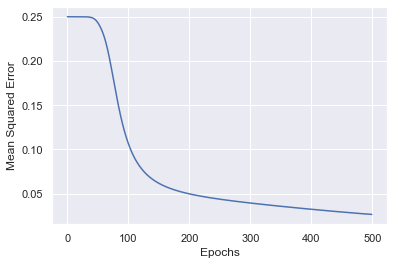

In [13]:
nn = neuralNetwork()
nn.fit(X_train, Y_train, epochs=500, learning_rate=.01, display_loss=True, activation_function='sigmoid', initialise='zeros')

In [14]:
Y_pred_train = nn.predict(X_train, activation_function='sigmoid')
Y_pred_binarised_train = (Y_pred_train >= 0.5).astype("int").ravel()
Y_pred_test = nn.predict(X_test, activation_function='sigmoid')
Y_pred_binarised_test = (Y_pred_test >= 0.5).astype("int").ravel()
accuracy_train = accuracy_score(Y_pred_binarised_train, Y_train)
accuracy_val = accuracy_score(Y_pred_binarised_test, Y_test)

print("Training accuracy", round(accuracy_train, 2))
print("Validation accuracy", round(accuracy_val, 2))

Training accuracy 0.97
Validation accuracy 0.98


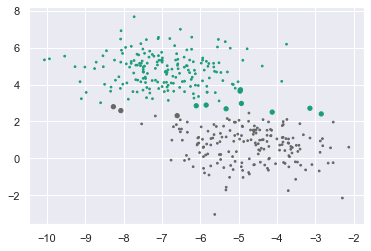

In [15]:
plt.scatter(X_train[:,0], X_train[:,1], c=Y_pred_binarised_train, cmap='Dark2',
            s=15*(np.abs(Y_pred_binarised_train-Y_train)+.2))
plt.show()

**Initialization Function: Random, Activation Function: Sigmoid**

100%|██████████| 500/500 [00:16<00:00, 30.75epoch/s]


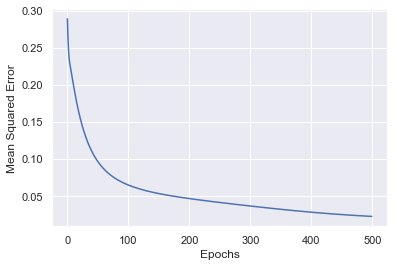

In [16]:
nn = neuralNetwork()
nn.fit(X_train, Y_train, epochs=500, learning_rate=.01, display_loss=True, activation_function='sigmoid')

In [17]:
Y_pred_train = nn.predict(X_train, activation_function='sigmoid')
Y_pred_binarised_train = (Y_pred_train >= 0.5).astype("int").ravel()
Y_pred_test = nn.predict(X_test, activation_function='sigmoid')
Y_pred_binarised_test = (Y_pred_test >= 0.5).astype("int").ravel()
accuracy_train = accuracy_score(Y_pred_binarised_train, Y_train)
accuracy_val = accuracy_score(Y_pred_binarised_test, Y_test)

print("Training accuracy", round(accuracy_train, 2))
print("Validation accuracy", round(accuracy_val, 2))

Training accuracy 0.98
Validation accuracy 0.98


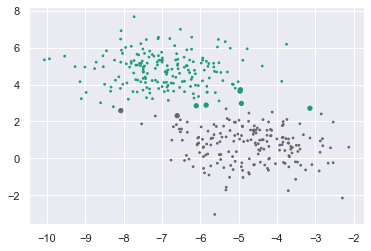

In [18]:
plt.scatter(X_train[:,0], X_train[:,1], c=Y_pred_binarised_train, cmap='Dark2',
            s=15*(np.abs(Y_pred_binarised_train-Y_train)+.2))
plt.show()

**Initialization Function: Xavier, Activation Function: Sigmoid**

100%|██████████| 500/500 [00:16<00:00, 30.83epoch/s]


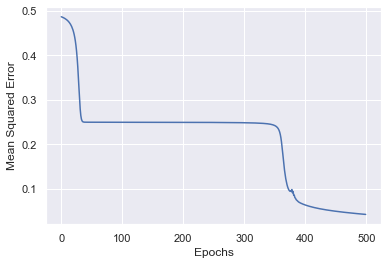

In [19]:
nn = neuralNetwork()
nn.fit(X_train, Y_train, epochs=500, learning_rate=.01, display_loss=True, activation_function='sigmoid', initialise='xavier')

In [20]:
Y_pred_train = nn.predict(X_train, activation_function='sigmoid')
Y_pred_binarised_train = (Y_pred_train >= 0.5).astype("int").ravel()
Y_pred_test = nn.predict(X_test, activation_function='sigmoid')
Y_pred_binarised_test = (Y_pred_test >= 0.5).astype("int").ravel()
accuracy_train = accuracy_score(Y_pred_binarised_train, Y_train)
accuracy_val = accuracy_score(Y_pred_binarised_test, Y_test)

print("Training accuracy", round(accuracy_train, 2))
print("Validation accuracy", round(accuracy_val, 2))

Training accuracy 0.95
Validation accuracy 0.95


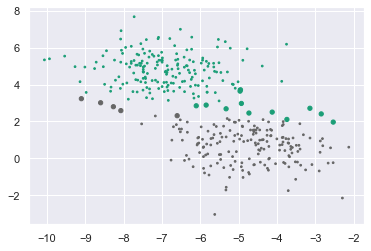

In [21]:
plt.scatter(X_train[:,0], X_train[:,1], c=Y_pred_binarised_train, cmap='Dark2',
            s=15*(np.abs(Y_pred_binarised_train-Y_train)+.2))
plt.show()

**Initialization Function: He, Activation Function: Sigmoid**

100%|██████████| 500/500 [00:16<00:00, 31.23epoch/s]


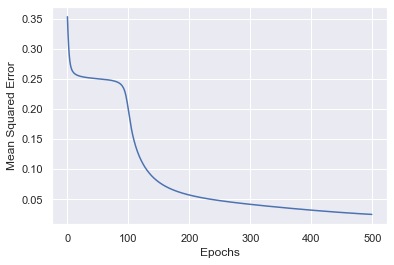

In [22]:
nn = neuralNetwork()
nn.fit(X_train, Y_train, epochs=500, learning_rate=.01, display_loss=True, activation_function='sigmoid', initialise='he')

In [23]:
Y_pred_train = nn.predict(X_train, activation_function='sigmoid')
Y_pred_binarised_train = (Y_pred_train >= 0.5).astype("int").ravel()
Y_pred_test = nn.predict(X_test, activation_function='sigmoid')
Y_pred_binarised_test = (Y_pred_test >= 0.5).astype("int").ravel()
accuracy_train = accuracy_score(Y_pred_binarised_train, Y_train)
accuracy_val = accuracy_score(Y_pred_binarised_test, Y_test)

print("Training accuracy", round(accuracy_train, 2))
print("Validation accuracy", round(accuracy_val, 2))

Training accuracy 0.98
Validation accuracy 0.98


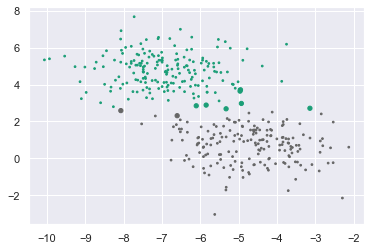

In [24]:
plt.scatter(X_train[:,0], X_train[:,1], c=Y_pred_binarised_train, cmap='Dark2',
            s=15*(np.abs(Y_pred_binarised_train-Y_train)+.2))
plt.show()

**Initialization Function: Zeros, Activation Function: Tanh**

100%|██████████| 500/500 [00:15<00:00, 32.82epoch/s]


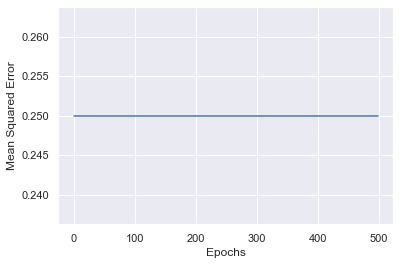

In [25]:
nn = neuralNetwork()
nn.fit(X_train, Y_train, epochs=500, learning_rate=.01, display_loss=True, activation_function='tanh', initialise='zeros')

In [26]:
Y_pred_train = nn.predict(X_train, activation_function='tanh')
Y_pred_binarised_train = (Y_pred_train >= 0.5).astype("int").ravel()
Y_pred_test = nn.predict(X_test, activation_function='tanh')
Y_pred_binarised_test = (Y_pred_test >= 0.5).astype("int").ravel()
accuracy_train = accuracy_score(Y_pred_binarised_train, Y_train)
accuracy_val = accuracy_score(Y_pred_binarised_test, Y_test)

print("Training accuracy", round(accuracy_train, 2))
print("Validation accuracy", round(accuracy_val, 2))

Training accuracy 0.5
Validation accuracy 0.5


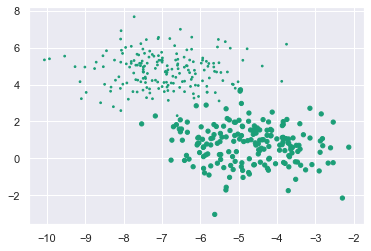

In [27]:
plt.scatter(X_train[:,0], X_train[:,1], c=Y_pred_binarised_train, cmap='Dark2',
            s=15*(np.abs(Y_pred_binarised_train-Y_train)+.2))
plt.show()

**Initialization Function: Random, Activation Function: Tanh**

  9%|▉         | 47/500 [00:01<00:16, 28.14epoch/s]<ipython-input-12-be287ce36ae8>:18: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
 10%|█         | 50/500 [00:01<00:16, 27.90epoch/s]<ipython-input-12-be287ce36ae8>:18: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-12-be287ce36ae8>:18: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-12-be287ce36ae8>:18: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-12-be287ce36ae8>:18: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
 11%|█         | 54/500 [00:01<00:15, 29.28epoch/s]<ipython-input-12-be287ce36ae8>:18: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-12-be287ce36ae8>:18: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipytho

 19%|█▉        | 95/500 [00:03<00:14, 28.32epoch/s]<ipython-input-12-be287ce36ae8>:18: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-12-be287ce36ae8>:15: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
<ipython-input-12-be287ce36ae8>:18: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-12-be287ce36ae8>:15: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
<ipython-input-12-be287ce36ae8>:18: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-12-be287ce36ae8>:15: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
 20%|█▉        | 98/500 [00:03<00:14, 28.50epoch/s]<ipython-input-12-be287ce36ae8>:18: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-12-be287ce36ae8>:15: RuntimeWarning: overflow encountered in exp
  

<ipython-input-12-be287ce36ae8>:18: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-12-be287ce36ae8>:15: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
<ipython-input-12-be287ce36ae8>:18: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-12-be287ce36ae8>:15: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
 26%|██▌       | 130/500 [00:04<00:17, 21.45epoch/s]<ipython-input-12-be287ce36ae8>:18: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-12-be287ce36ae8>:15: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
<ipython-input-12-be287ce36ae8>:18: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-12-be287ce36ae8>:15: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
<ipython-input-12-be

<ipython-input-12-be287ce36ae8>:18: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-12-be287ce36ae8>:15: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
<ipython-input-12-be287ce36ae8>:18: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-12-be287ce36ae8>:15: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
 33%|███▎      | 164/500 [00:06<00:11, 28.24epoch/s]<ipython-input-12-be287ce36ae8>:18: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-12-be287ce36ae8>:15: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
<ipython-input-12-be287ce36ae8>:18: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-12-be287ce36ae8>:15: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
<ipython-input-12-be

 39%|███▉      | 196/500 [00:07<00:10, 28.66epoch/s]<ipython-input-12-be287ce36ae8>:18: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-12-be287ce36ae8>:15: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
<ipython-input-12-be287ce36ae8>:18: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-12-be287ce36ae8>:15: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
<ipython-input-12-be287ce36ae8>:18: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-12-be287ce36ae8>:15: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
 40%|███▉      | 199/500 [00:07<00:10, 28.41epoch/s]<ipython-input-12-be287ce36ae8>:18: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-12-be287ce36ae8>:15: RuntimeWarning: overflow encountered in exp


 46%|████▌     | 229/500 [00:08<00:09, 27.61epoch/s]<ipython-input-12-be287ce36ae8>:18: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-12-be287ce36ae8>:15: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
<ipython-input-12-be287ce36ae8>:18: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-12-be287ce36ae8>:15: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
<ipython-input-12-be287ce36ae8>:18: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-12-be287ce36ae8>:15: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
 46%|████▋     | 232/500 [00:08<00:09, 27.91epoch/s]<ipython-input-12-be287ce36ae8>:18: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-12-be287ce36ae8>:15: RuntimeWarning: overflow encountered in exp


 52%|█████▏    | 262/500 [00:09<00:10, 23.46epoch/s]<ipython-input-12-be287ce36ae8>:18: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-12-be287ce36ae8>:15: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
<ipython-input-12-be287ce36ae8>:18: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-12-be287ce36ae8>:15: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
<ipython-input-12-be287ce36ae8>:18: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-12-be287ce36ae8>:15: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
 53%|█████▎    | 265/500 [00:09<00:09, 24.62epoch/s]<ipython-input-12-be287ce36ae8>:18: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-12-be287ce36ae8>:15: RuntimeWarning: overflow encountered in exp


 59%|█████▉    | 295/500 [00:10<00:07, 26.37epoch/s]<ipython-input-12-be287ce36ae8>:18: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-12-be287ce36ae8>:15: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
<ipython-input-12-be287ce36ae8>:18: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-12-be287ce36ae8>:15: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
<ipython-input-12-be287ce36ae8>:18: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-12-be287ce36ae8>:15: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
 60%|█████▉    | 298/500 [00:11<00:08, 23.92epoch/s]<ipython-input-12-be287ce36ae8>:18: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-12-be287ce36ae8>:15: RuntimeWarning: overflow encountered in exp


 66%|██████▌   | 330/500 [00:12<00:05, 28.67epoch/s]<ipython-input-12-be287ce36ae8>:18: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-12-be287ce36ae8>:15: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
<ipython-input-12-be287ce36ae8>:18: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-12-be287ce36ae8>:15: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
<ipython-input-12-be287ce36ae8>:18: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-12-be287ce36ae8>:15: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
 67%|██████▋   | 333/500 [00:12<00:05, 28.82epoch/s]<ipython-input-12-be287ce36ae8>:18: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-12-be287ce36ae8>:15: RuntimeWarning: overflow encountered in exp


 73%|███████▎  | 364/500 [00:13<00:05, 26.79epoch/s]<ipython-input-12-be287ce36ae8>:18: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-12-be287ce36ae8>:15: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
<ipython-input-12-be287ce36ae8>:18: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-12-be287ce36ae8>:15: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
<ipython-input-12-be287ce36ae8>:18: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-12-be287ce36ae8>:15: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
<ipython-input-12-be287ce36ae8>:18: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-12-be287ce36ae8>:15: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
 74%|███████▎  | 368

<ipython-input-12-be287ce36ae8>:15: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
<ipython-input-12-be287ce36ae8>:18: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-12-be287ce36ae8>:15: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
 80%|███████▉  | 399/500 [00:15<00:06, 16.17epoch/s]<ipython-input-12-be287ce36ae8>:18: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-12-be287ce36ae8>:15: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
<ipython-input-12-be287ce36ae8>:18: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-12-be287ce36ae8>:15: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
 80%|████████  | 401/500 [00:15<00:05, 17.13epoch/s]<ipython-input-12-be287ce36ae8>:18: RuntimeWarning: overflow encountered in exp
  return

<ipython-input-12-be287ce36ae8>:15: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
 86%|████████▌ | 431/500 [00:16<00:03, 22.33epoch/s]<ipython-input-12-be287ce36ae8>:18: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-12-be287ce36ae8>:15: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
<ipython-input-12-be287ce36ae8>:18: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-12-be287ce36ae8>:15: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
<ipython-input-12-be287ce36ae8>:18: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-12-be287ce36ae8>:15: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
 87%|████████▋ | 434/500 [00:16<00:03, 21.83epoch/s]<ipython-input-12-be287ce36ae8>:18: RuntimeWarning: overflow encountered in exp
  return

<ipython-input-12-be287ce36ae8>:15: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
 93%|█████████▎| 467/500 [00:17<00:01, 26.71epoch/s]<ipython-input-12-be287ce36ae8>:18: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-12-be287ce36ae8>:15: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
<ipython-input-12-be287ce36ae8>:18: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-12-be287ce36ae8>:15: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
<ipython-input-12-be287ce36ae8>:18: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-12-be287ce36ae8>:15: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
 94%|█████████▍| 470/500 [00:17<00:01, 27.44epoch/s]<ipython-input-12-be287ce36ae8>:18: RuntimeWarning: overflow encountered in exp
  return

100%|██████████| 500/500 [00:19<00:00, 26.18epoch/s]


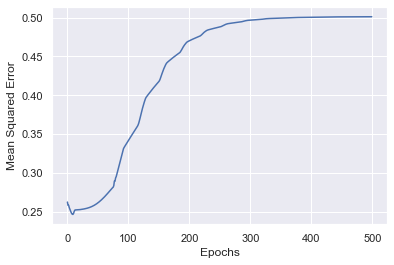

In [28]:
nn = neuralNetwork()
nn.fit(X_train, Y_train, epochs=500, learning_rate=.01, display_loss=True, activation_function='tanh')

In [29]:
Y_pred_train = nn.predict(X_train, activation_function='tanh')
Y_pred_binarised_train = (Y_pred_train >= 0.5).astype("int").ravel()
Y_pred_test = nn.predict(X_test, activation_function='tanh')
Y_pred_binarised_test = (Y_pred_test >= 0.5).astype("int").ravel()
accuracy_train = accuracy_score(Y_pred_binarised_train, Y_train)
accuracy_val = accuracy_score(Y_pred_binarised_test, Y_test)

print("Training accuracy", round(accuracy_train, 2))
print("Validation accuracy", round(accuracy_val, 2))

Training accuracy 0.5
Validation accuracy 0.5


<ipython-input-12-be287ce36ae8>:18: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1


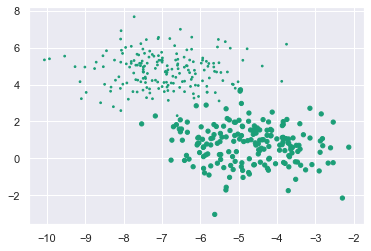

In [30]:
plt.scatter(X_train[:,0], X_train[:,1], c=Y_pred_binarised_train, cmap='Dark2',
            s=15*(np.abs(Y_pred_binarised_train-Y_train)+.2))
plt.show()

**Initialization Function: Xavier, Activation Function: Tanh**

  2%|▏         | 10/500 [00:00<00:16, 28.96epoch/s]<ipython-input-12-be287ce36ae8>:15: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
  3%|▎         | 14/500 [00:00<00:16, 29.76epoch/s]<ipython-input-12-be287ce36ae8>:18: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-12-be287ce36ae8>:15: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
<ipython-input-12-be287ce36ae8>:18: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
  7%|▋         | 35/500 [00:01<00:15, 29.73epoch/s]<ipython-input-12-be287ce36ae8>:18: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-12-be287ce36ae8>:18: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-12-be287ce36ae8>:18: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
  8%|▊         | 39/500

<ipython-input-12-be287ce36ae8>:15: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
<ipython-input-12-be287ce36ae8>:18: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-12-be287ce36ae8>:15: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
 16%|█▌        | 79/500 [00:02<00:14, 28.58epoch/s]<ipython-input-12-be287ce36ae8>:18: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-12-be287ce36ae8>:15: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
<ipython-input-12-be287ce36ae8>:18: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-12-be287ce36ae8>:15: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
<ipython-input-12-be287ce36ae8>:18: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-12-be2

<ipython-input-12-be287ce36ae8>:18: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-12-be287ce36ae8>:15: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
<ipython-input-12-be287ce36ae8>:18: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-12-be287ce36ae8>:15: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
 23%|██▎       | 114/500 [00:04<00:14, 26.42epoch/s]<ipython-input-12-be287ce36ae8>:18: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-12-be287ce36ae8>:15: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
<ipython-input-12-be287ce36ae8>:18: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-12-be287ce36ae8>:15: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
<ipython-input-12-be

 29%|██▉       | 147/500 [00:05<00:12, 29.31epoch/s]<ipython-input-12-be287ce36ae8>:18: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-12-be287ce36ae8>:15: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
<ipython-input-12-be287ce36ae8>:18: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-12-be287ce36ae8>:15: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
<ipython-input-12-be287ce36ae8>:18: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-12-be287ce36ae8>:15: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
<ipython-input-12-be287ce36ae8>:18: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-12-be287ce36ae8>:15: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
 30%|███       | 151

 37%|███▋      | 183/500 [00:06<00:11, 28.40epoch/s]<ipython-input-12-be287ce36ae8>:18: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-12-be287ce36ae8>:15: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
<ipython-input-12-be287ce36ae8>:18: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-12-be287ce36ae8>:15: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
<ipython-input-12-be287ce36ae8>:18: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-12-be287ce36ae8>:15: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
<ipython-input-12-be287ce36ae8>:18: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-12-be287ce36ae8>:15: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
 37%|███▋      | 187

<ipython-input-12-be287ce36ae8>:18: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-12-be287ce36ae8>:15: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
 44%|████▍     | 219/500 [00:07<00:09, 29.46epoch/s]<ipython-input-12-be287ce36ae8>:18: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-12-be287ce36ae8>:15: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
<ipython-input-12-be287ce36ae8>:18: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-12-be287ce36ae8>:15: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
<ipython-input-12-be287ce36ae8>:18: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-12-be287ce36ae8>:15: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
<ipython-input-12-be

<ipython-input-12-be287ce36ae8>:15: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
<ipython-input-12-be287ce36ae8>:18: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-12-be287ce36ae8>:15: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
<ipython-input-12-be287ce36ae8>:18: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-12-be287ce36ae8>:15: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
 51%|█████     | 255/500 [00:08<00:08, 29.26epoch/s]<ipython-input-12-be287ce36ae8>:18: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-12-be287ce36ae8>:15: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
<ipython-input-12-be287ce36ae8>:18: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-12-be

 57%|█████▋    | 287/500 [00:10<00:07, 28.10epoch/s]<ipython-input-12-be287ce36ae8>:18: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-12-be287ce36ae8>:15: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
<ipython-input-12-be287ce36ae8>:18: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-12-be287ce36ae8>:15: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
<ipython-input-12-be287ce36ae8>:18: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-12-be287ce36ae8>:15: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
 58%|█████▊    | 290/500 [00:10<00:08, 24.89epoch/s]<ipython-input-12-be287ce36ae8>:18: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-12-be287ce36ae8>:15: RuntimeWarning: overflow encountered in exp


 64%|██████▍   | 320/500 [00:11<00:06, 29.57epoch/s]<ipython-input-12-be287ce36ae8>:18: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-12-be287ce36ae8>:15: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
<ipython-input-12-be287ce36ae8>:18: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-12-be287ce36ae8>:15: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
<ipython-input-12-be287ce36ae8>:18: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-12-be287ce36ae8>:15: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
 65%|██████▍   | 323/500 [00:11<00:06, 27.69epoch/s]<ipython-input-12-be287ce36ae8>:18: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-12-be287ce36ae8>:15: RuntimeWarning: overflow encountered in exp


 71%|███████   | 355/500 [00:12<00:05, 26.33epoch/s]<ipython-input-12-be287ce36ae8>:18: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-12-be287ce36ae8>:15: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
<ipython-input-12-be287ce36ae8>:18: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-12-be287ce36ae8>:15: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
<ipython-input-12-be287ce36ae8>:18: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-12-be287ce36ae8>:15: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
 72%|███████▏  | 358/500 [00:12<00:05, 26.07epoch/s]<ipython-input-12-be287ce36ae8>:18: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-12-be287ce36ae8>:15: RuntimeWarning: overflow encountered in exp


<ipython-input-12-be287ce36ae8>:15: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
<ipython-input-12-be287ce36ae8>:18: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-12-be287ce36ae8>:15: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
 78%|███████▊  | 390/500 [00:13<00:03, 29.12epoch/s]<ipython-input-12-be287ce36ae8>:18: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-12-be287ce36ae8>:15: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
<ipython-input-12-be287ce36ae8>:18: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-12-be287ce36ae8>:15: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
<ipython-input-12-be287ce36ae8>:18: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-12-be

<ipython-input-12-be287ce36ae8>:15: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
 85%|████████▌ | 425/500 [00:15<00:02, 28.37epoch/s]<ipython-input-12-be287ce36ae8>:18: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-12-be287ce36ae8>:15: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
<ipython-input-12-be287ce36ae8>:18: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-12-be287ce36ae8>:15: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
<ipython-input-12-be287ce36ae8>:18: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-12-be287ce36ae8>:15: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
 86%|████████▌ | 428/500 [00:15<00:02, 28.46epoch/s]<ipython-input-12-be287ce36ae8>:18: RuntimeWarning: overflow encountered in exp
  return

<ipython-input-12-be287ce36ae8>:15: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
<ipython-input-12-be287ce36ae8>:18: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-12-be287ce36ae8>:15: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
 92%|█████████▏| 461/500 [00:16<00:01, 30.11epoch/s]<ipython-input-12-be287ce36ae8>:18: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-12-be287ce36ae8>:15: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
<ipython-input-12-be287ce36ae8>:18: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-12-be287ce36ae8>:15: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
<ipython-input-12-be287ce36ae8>:18: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-12-be

<ipython-input-12-be287ce36ae8>:18: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-12-be287ce36ae8>:15: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
<ipython-input-12-be287ce36ae8>:18: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-12-be287ce36ae8>:15: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
 99%|█████████▉| 495/500 [00:17<00:00, 20.82epoch/s]<ipython-input-12-be287ce36ae8>:18: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-12-be287ce36ae8>:15: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
<ipython-input-12-be287ce36ae8>:18: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-12-be287ce36ae8>:15: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
<ipython-input-12-be

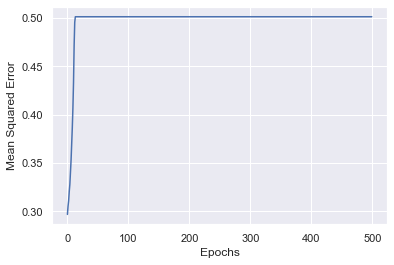

In [31]:
nn = neuralNetwork()
nn.fit(X_train, Y_train, epochs=500, learning_rate=.01, display_loss=True, activation_function='tanh', initialise='xavier')

In [32]:
Y_pred_train = nn.predict(X_train, activation_function='tanh')
Y_pred_binarised_train = (Y_pred_train >= 0.5).astype("int").ravel()
Y_pred_test = nn.predict(X_test, activation_function='tanh')
Y_pred_binarised_test = (Y_pred_test >= 0.5).astype("int").ravel()
accuracy_train = accuracy_score(Y_pred_binarised_train, Y_train)
accuracy_val = accuracy_score(Y_pred_binarised_test, Y_test)

print("Training accuracy", round(accuracy_train, 2))
print("Validation accuracy", round(accuracy_val, 2))

Training accuracy 0.5
Validation accuracy 0.5


<ipython-input-12-be287ce36ae8>:18: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1


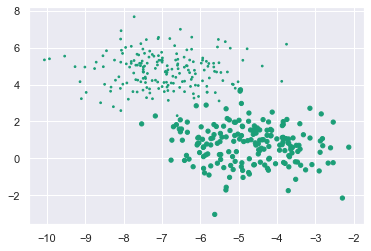

In [33]:
plt.scatter(X_train[:,0], X_train[:,1], c=Y_pred_binarised_train, cmap='Dark2',
            s=15*(np.abs(Y_pred_binarised_train-Y_train)+.2))
plt.show()

**Initialization Function: He, Activation Function: Tanh**

 24%|██▎       | 118/500 [00:04<00:15, 25.46epoch/s]<ipython-input-12-be287ce36ae8>:18: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
 24%|██▍       | 121/500 [00:04<00:16, 22.95epoch/s]<ipython-input-12-be287ce36ae8>:18: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-12-be287ce36ae8>:18: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-12-be287ce36ae8>:18: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
 25%|██▍       | 124/500 [00:04<00:15, 24.24epoch/s]<ipython-input-12-be287ce36ae8>:18: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-12-be287ce36ae8>:18: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-12-be287ce36ae8>:18: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
 25%

<ipython-input-12-be287ce36ae8>:18: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
 36%|███▋      | 182/500 [00:06<00:11, 27.22epoch/s]<ipython-input-12-be287ce36ae8>:18: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-12-be287ce36ae8>:18: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-12-be287ce36ae8>:18: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
 37%|███▋      | 185/500 [00:06<00:11, 27.71epoch/s]<ipython-input-12-be287ce36ae8>:18: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-12-be287ce36ae8>:18: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-12-be287ce36ae8>:18: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
 38%|███▊      | 188/500 [00:07<00:11, 27.68epoch/s]<ipy

 49%|████▊     | 243/500 [00:08<00:09, 27.55epoch/s]<ipython-input-12-be287ce36ae8>:18: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-12-be287ce36ae8>:18: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-12-be287ce36ae8>:18: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-12-be287ce36ae8>:18: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
 49%|████▉     | 247/500 [00:09<00:08, 28.40epoch/s]<ipython-input-12-be287ce36ae8>:18: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-12-be287ce36ae8>:15: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
<ipython-input-12-be287ce36ae8>:18: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-12-be287ce36ae8>:15: RuntimeWarning: overflow enc

 56%|█████▌    | 278/500 [00:10<00:07, 28.72epoch/s]<ipython-input-12-be287ce36ae8>:18: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-12-be287ce36ae8>:15: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
<ipython-input-12-be287ce36ae8>:18: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-12-be287ce36ae8>:15: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
<ipython-input-12-be287ce36ae8>:18: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-12-be287ce36ae8>:15: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
<ipython-input-12-be287ce36ae8>:18: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-12-be287ce36ae8>:15: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
 56%|█████▋    | 282

<ipython-input-12-be287ce36ae8>:18: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-12-be287ce36ae8>:15: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
<ipython-input-12-be287ce36ae8>:18: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-12-be287ce36ae8>:15: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
 63%|██████▎   | 314/500 [00:11<00:06, 27.25epoch/s]<ipython-input-12-be287ce36ae8>:18: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-12-be287ce36ae8>:15: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
<ipython-input-12-be287ce36ae8>:18: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-12-be287ce36ae8>:15: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
<ipython-input-12-be

<ipython-input-12-be287ce36ae8>:18: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-12-be287ce36ae8>:15: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
 70%|██████▉   | 348/500 [00:12<00:05, 26.73epoch/s]<ipython-input-12-be287ce36ae8>:18: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-12-be287ce36ae8>:15: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
<ipython-input-12-be287ce36ae8>:18: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-12-be287ce36ae8>:15: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
<ipython-input-12-be287ce36ae8>:18: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-12-be287ce36ae8>:15: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
 70%|███████   | 351

 76%|███████▌  | 380/500 [00:13<00:04, 29.13epoch/s]<ipython-input-12-be287ce36ae8>:18: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-12-be287ce36ae8>:15: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
<ipython-input-12-be287ce36ae8>:18: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-12-be287ce36ae8>:15: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
<ipython-input-12-be287ce36ae8>:18: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-12-be287ce36ae8>:15: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
 77%|███████▋  | 383/500 [00:14<00:04, 29.06epoch/s]<ipython-input-12-be287ce36ae8>:18: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-12-be287ce36ae8>:15: RuntimeWarning: overflow encountered in exp


<ipython-input-12-be287ce36ae8>:15: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
<ipython-input-12-be287ce36ae8>:18: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-12-be287ce36ae8>:15: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
 83%|████████▎ | 415/500 [00:15<00:03, 21.83epoch/s]<ipython-input-12-be287ce36ae8>:18: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-12-be287ce36ae8>:15: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
<ipython-input-12-be287ce36ae8>:18: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-12-be287ce36ae8>:15: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
<ipython-input-12-be287ce36ae8>:18: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-12-be

 89%|████████▉ | 447/500 [00:16<00:01, 29.78epoch/s]<ipython-input-12-be287ce36ae8>:18: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-12-be287ce36ae8>:15: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
<ipython-input-12-be287ce36ae8>:18: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-12-be287ce36ae8>:15: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
<ipython-input-12-be287ce36ae8>:18: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-12-be287ce36ae8>:15: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
<ipython-input-12-be287ce36ae8>:18: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-12-be287ce36ae8>:15: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
 90%|█████████ | 451

 96%|█████████▌| 480/500 [00:17<00:00, 25.57epoch/s]<ipython-input-12-be287ce36ae8>:18: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-12-be287ce36ae8>:15: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
<ipython-input-12-be287ce36ae8>:18: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-12-be287ce36ae8>:15: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
<ipython-input-12-be287ce36ae8>:18: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-12-be287ce36ae8>:15: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
<ipython-input-12-be287ce36ae8>:18: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-12-be287ce36ae8>:15: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
 97%|█████████▋| 484

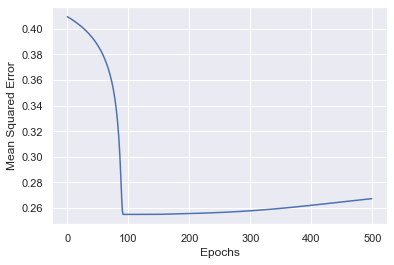

In [34]:
nn = neuralNetwork()
nn.fit(X_train, Y_train, epochs=500, learning_rate=.01, display_loss=True, activation_function='tanh', initialise='he')

In [35]:
Y_pred_train = nn.predict(X_train, activation_function='tanh')
Y_pred_binarised_train = (Y_pred_train >= 0.5).astype("int").ravel()
Y_pred_test = nn.predict(X_test, activation_function='tanh')
Y_pred_binarised_test = (Y_pred_test >= 0.5).astype("int").ravel()
accuracy_train = accuracy_score(Y_pred_binarised_train, Y_train)
accuracy_val = accuracy_score(Y_pred_binarised_test, Y_test)

print("Training accuracy", round(accuracy_train, 2))
print("Validation accuracy", round(accuracy_val, 2))

Training accuracy 0.5
Validation accuracy 0.5


<ipython-input-12-be287ce36ae8>:18: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1


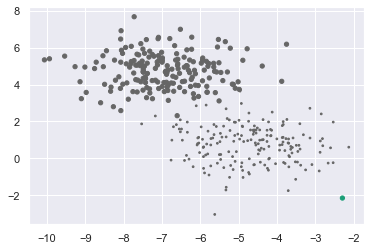

In [36]:
plt.scatter(X_train[:,0], X_train[:,1], c=Y_pred_binarised_train, cmap='Dark2',
            s=15*(np.abs(Y_pred_binarised_train-Y_train)+.2))
plt.show()

**Initialization Function: Zeros, Activation Function: Relu**

100%|██████████| 500/500 [00:19<00:00, 25.42epoch/s]


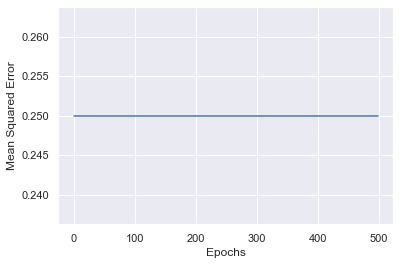

In [37]:
nn = neuralNetwork()
nn.fit(X_train, Y_train, epochs=500, learning_rate=.01, display_loss=True, activation_function='relu', initialise='zeros')

In [38]:
Y_pred_train = nn.predict(X_train, activation_function='relu')
Y_pred_binarised_train = (Y_pred_train >= 0.5).astype("int").ravel()
Y_pred_test = nn.predict(X_test, activation_function='relu')
Y_pred_binarised_test = (Y_pred_test >= 0.5).astype("int").ravel()
accuracy_train = accuracy_score(Y_pred_binarised_train, Y_train)
accuracy_val = accuracy_score(Y_pred_binarised_test, Y_test)

print("Training accuracy", round(accuracy_train, 2))
print("Validation accuracy", round(accuracy_val, 2))

Training accuracy 0.5
Validation accuracy 0.5


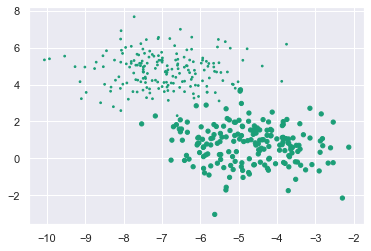

In [39]:
plt.scatter(X_train[:,0], X_train[:,1], c=Y_pred_binarised_train, cmap='Dark2',
            s=15*(np.abs(Y_pred_binarised_train-Y_train)+.2))
plt.show()

**Initialization Function: Random, Activation Function: Relu**

100%|██████████| 500/500 [00:20<00:00, 24.23epoch/s]


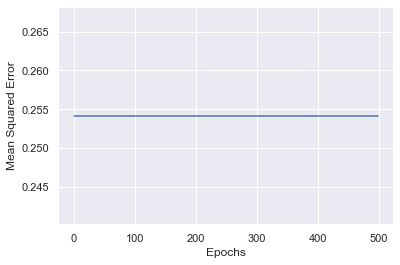

In [40]:
nn = neuralNetwork()
nn.fit(X_train, Y_train, epochs=500, learning_rate=.01, display_loss=True, activation_function='relu')

In [41]:
Y_pred_train = nn.predict(X_train, activation_function='relu')
Y_pred_binarised_train = (Y_pred_train >= 0.5).astype("int").ravel()
Y_pred_test = nn.predict(X_test, activation_function='relu')
Y_pred_binarised_test = (Y_pred_test >= 0.5).astype("int").ravel()
accuracy_train = accuracy_score(Y_pred_binarised_train, Y_train)
accuracy_val = accuracy_score(Y_pred_binarised_test, Y_test)

print("Training accuracy", round(accuracy_train, 2))
print("Validation accuracy", round(accuracy_val, 2))

Training accuracy 0.5
Validation accuracy 0.5


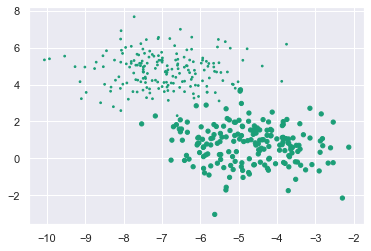

In [42]:
plt.scatter(X_train[:,0], X_train[:,1], c=Y_pred_binarised_train, cmap='Dark2',
            s=15*(np.abs(Y_pred_binarised_train-Y_train)+.2))
plt.show()

**Initialization Function: Xavier, Activation Function: Relu**

100%|██████████| 500/500 [00:20<00:00, 24.32epoch/s]


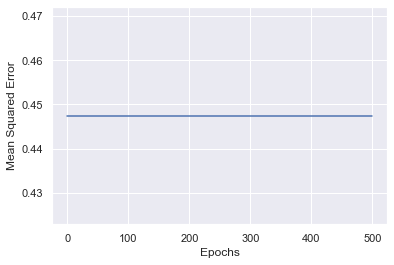

In [44]:
nn = neuralNetwork()
nn.fit(X_train, Y_train, epochs=500, learning_rate=.01, display_loss=True, activation_function='relu', initialise='xavier')

In [45]:
Y_pred_train = nn.predict(X_train, activation_function='relu')
Y_pred_binarised_train = (Y_pred_train >= 0.5).astype("int").ravel()
Y_pred_test = nn.predict(X_test, activation_function='relu')
Y_pred_binarised_test = (Y_pred_test >= 0.5).astype("int").ravel()
accuracy_train = accuracy_score(Y_pred_binarised_train, Y_train)
accuracy_val = accuracy_score(Y_pred_binarised_test, Y_test)

print("Training accuracy", round(accuracy_train, 2))
print("Validation accuracy", round(accuracy_val, 2))

Training accuracy 0.5
Validation accuracy 0.5


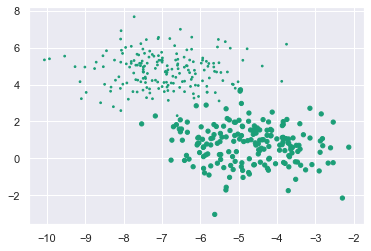

In [46]:
plt.scatter(X_train[:,0], X_train[:,1], c=Y_pred_binarised_train, cmap='Dark2',
            s=15*(np.abs(Y_pred_binarised_train-Y_train)+.2))
plt.show()

**Initialization Function: He, Activation Function: Relu**

100%|██████████| 500/500 [00:13<00:00, 35.86epoch/s]


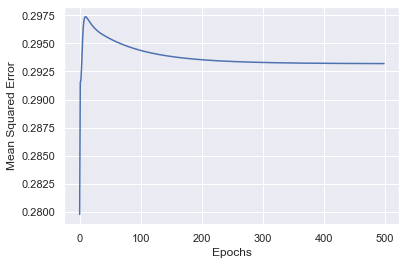

In [48]:
nn = neuralNetwork()
nn.fit(X_train, Y_train, epochs=500, learning_rate=.01, display_loss=True, activation_function='relu', initialise='he')

In [49]:
Y_pred_train = nn.predict(X_train, activation_function='relu')
Y_pred_binarised_train = (Y_pred_train >= 0.5).astype("int").ravel()
Y_pred_test = nn.predict(X_test, activation_function='relu')
Y_pred_binarised_test = (Y_pred_test >= 0.5).astype("int").ravel()
accuracy_train = accuracy_score(Y_pred_binarised_train, Y_train)
accuracy_val = accuracy_score(Y_pred_binarised_test, Y_test)

print("Training accuracy", round(accuracy_train, 2))
print("Validation accuracy", round(accuracy_val, 2))

Training accuracy 0.5
Validation accuracy 0.5


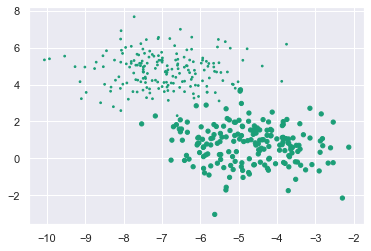

In [50]:
plt.scatter(X_train[:,0], X_train[:,1], c=Y_pred_binarised_train, cmap='Dark2',
            s=15*(np.abs(Y_pred_binarised_train-Y_train)+.2))
plt.show()